In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

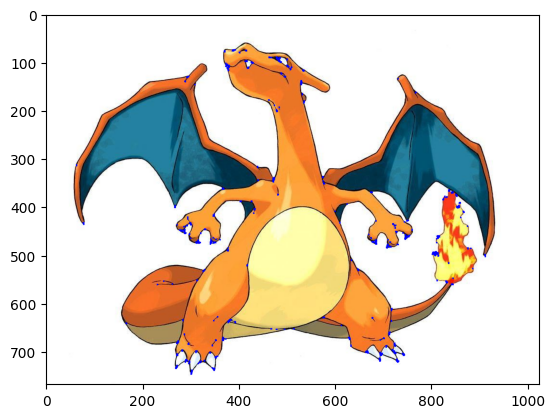

In [5]:
img = cv2.imread('image.jpg')  # Load your image here
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection using OpenCV
harris_corners = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
harris_corners = cv2.dilate(harris_corners, None)  # Enhancing corners

# Threshold for detecting strong corners
image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # corner color
plt.imshow(image, cmap='gray')
plt.show()

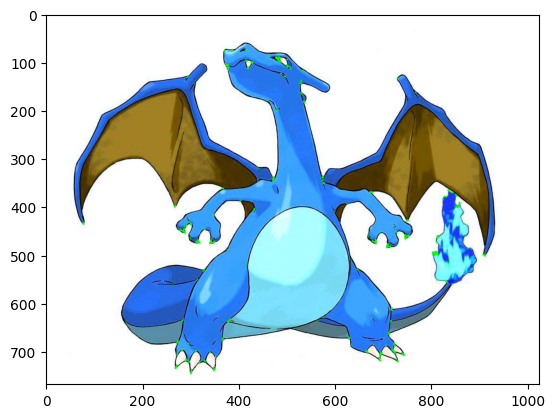

In [8]:
Ix = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)


Ixx = Ix ** 2
Iyy = Iy ** 2
Ixy = Ix * Iy


Ixx = gaussian_filter(Ixx, sigma=1)
Iyy = gaussian_filter(Iyy, sigma=1)
Ixy = gaussian_filter(Ixy, sigma=1)

k = 0.05
height, width = gray_image.shape
R = np.zeros((height, width))

for y in range(height):
    for x in range(width):
        M = np.array([[Ixx[y, x], Ixy[y, x]],
                      [Ixy[y, x], Iyy[y, x]]])
        det = np.linalg.det(M)
        trace = np.trace(M)
        R[y, x] = det - k * (trace ** 2)

threshold = 0.01 * R.max()
corner_img = img.copy()
corner_img[R > threshold] = [0, 255, 0]  # color of corner
color_img = cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB)

plt.imshow(corner_img)